# Heart Disease Prediction Using Machine Learning

This notebook demonstrates how to build machine learning models to predict heart disease risk using the UCI Heart Disease dataset. It includes steps for data analysis, visualization, and modeling using Logistic Regression, Decision Tree, and Random Forest.

**IMPORTING** **LIBRARIES**

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score


## Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:

# Load dataset (update path if running locally)
# Replace this with the correct path if you've downloaded the dataset locally.
url = "/content/drive/MyDrive/heart/heart.csv"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'target']
try:
    data = pd.read_csv(url, names=columns)
except Exception as e:
    print("Error loading dataset:", e)
    # Mock dataset for testing
    data = pd.DataFrame(np.random.rand(100, 14), columns=columns)
    data['target'] = np.random.choice([0, 1], size=100)

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


## Data Analysis

In [ ]:

# Display basic statistics
print(data.describe())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

### Correlation Analysis

In [ ]:

# Ensure all columns are numeric for correlation
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle missing values (drop or impute)
data = data.dropna()

# Calculate correlation matrix
correlation_matrix = data.corr()
correlation_matrix


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


## Data Visualization

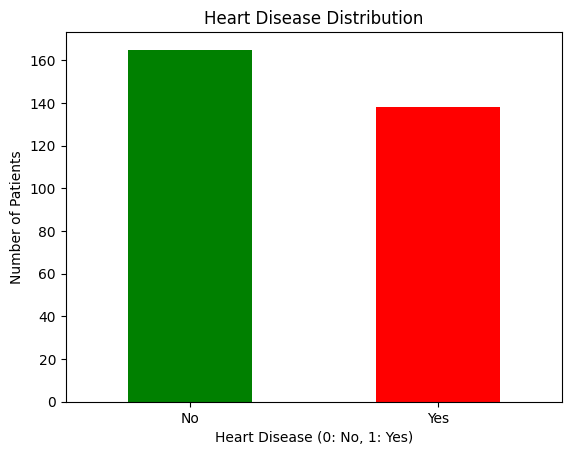

In [ ]:

# Visualize the number of patients with and without heart disease
data['target'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


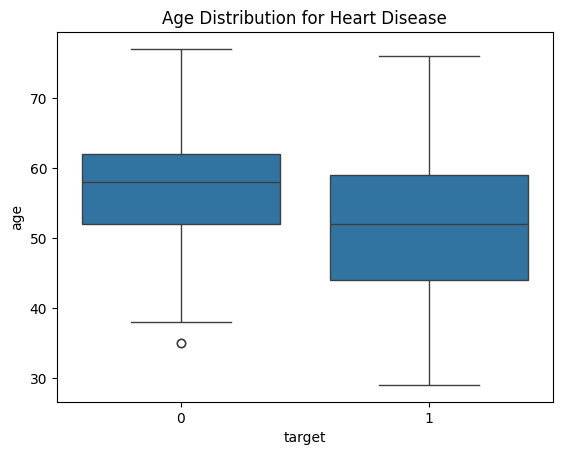

In [ ]:

# Age vs Heart Disease Visualization
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution for Heart Disease')
plt.show()


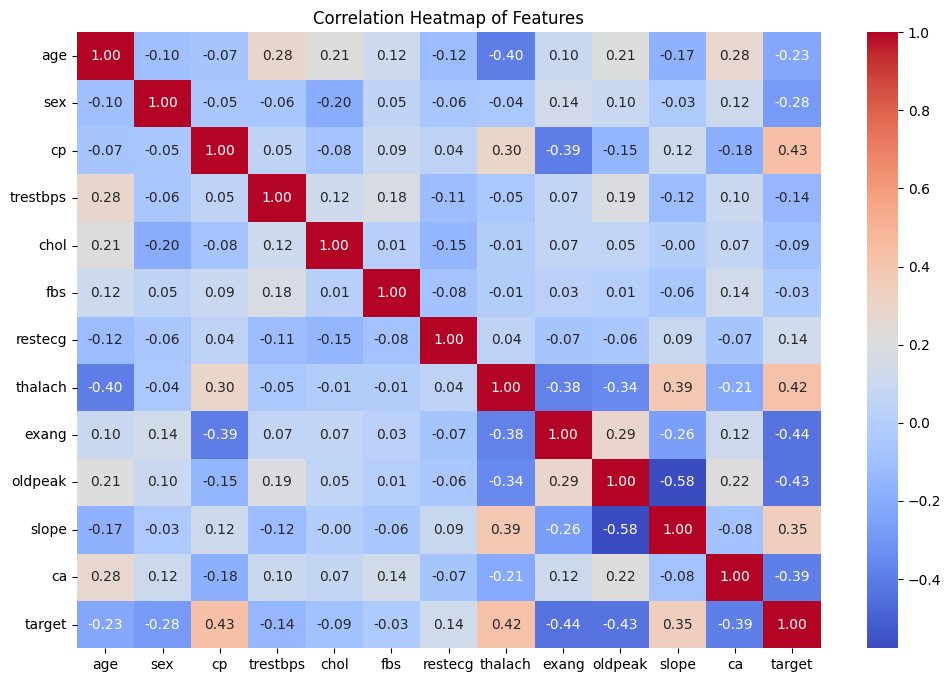

In [ ]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


## Logistic Regression Model

In [ ]:

# Split dataset into train and test sets (70:30)
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Linear Regresssion Confusion Matrix":\n",conf


Logistic Regression Confusion Matrix:
 [[35  6]
 [ 9 41]]
Logistic Regression Accuracy: 0.8351648351648352


## Decision Tree Model

Decision Tree Confusion Matrix:
 [[31 10]
 [ 9 41]]
Decision Tree Accuracy: 0.7912087912087912


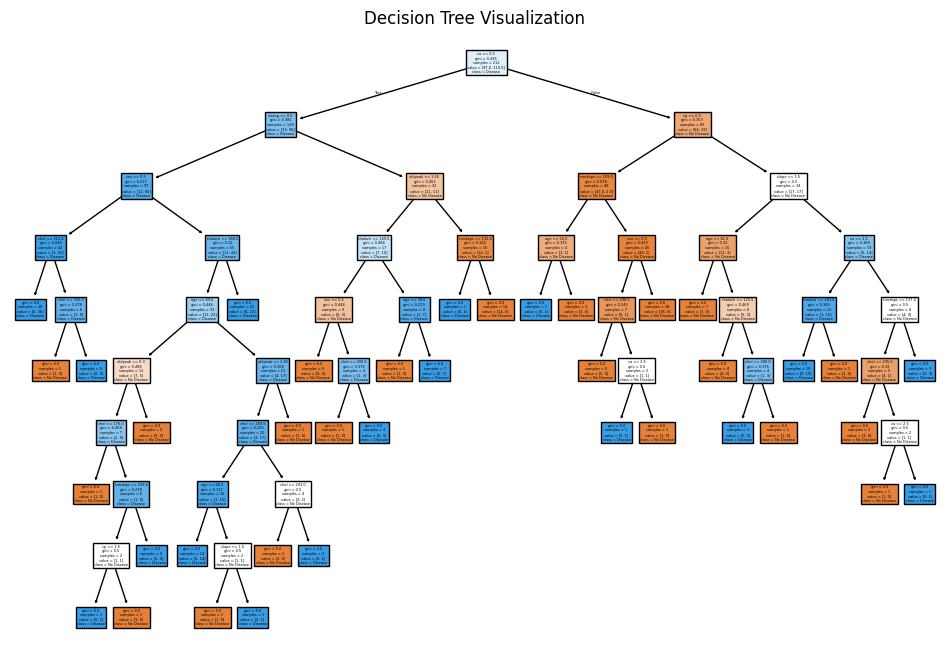

In [ ]:

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Evaluate Decision Tree
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dtree)
print("Decision Tree Accuracy:", accuracy_dtree)

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


## Random Forest Model

Random Forest Confusion Matrix:
 [[35  6]
 [ 6 44]]
Random Forest Accuracy: 0.8681318681318682


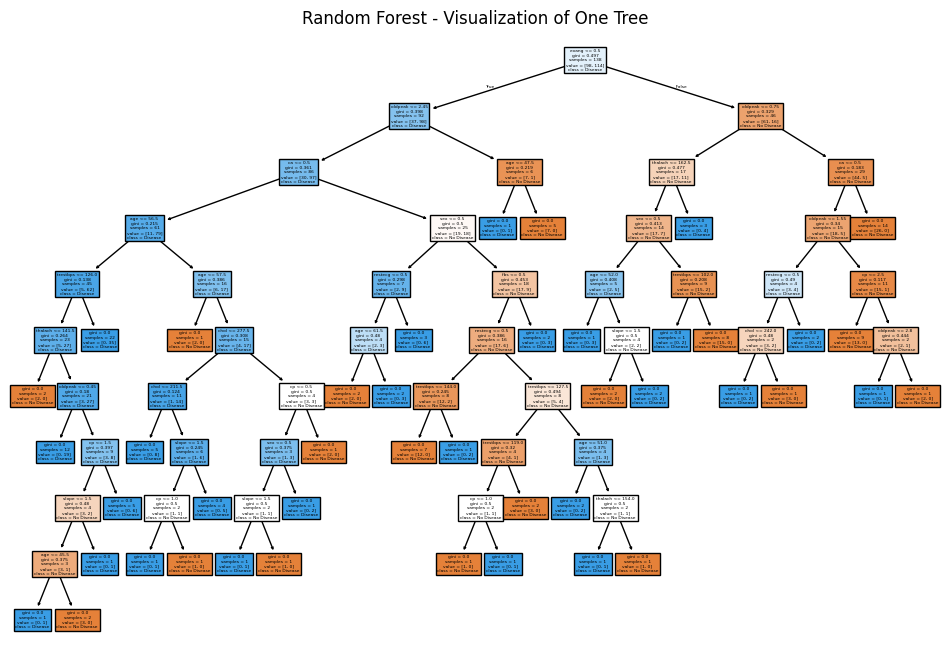

In [ ]:

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Visualize One Tree from Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Random Forest - Visualization of One Tree')
plt.show()


## Model Comparison

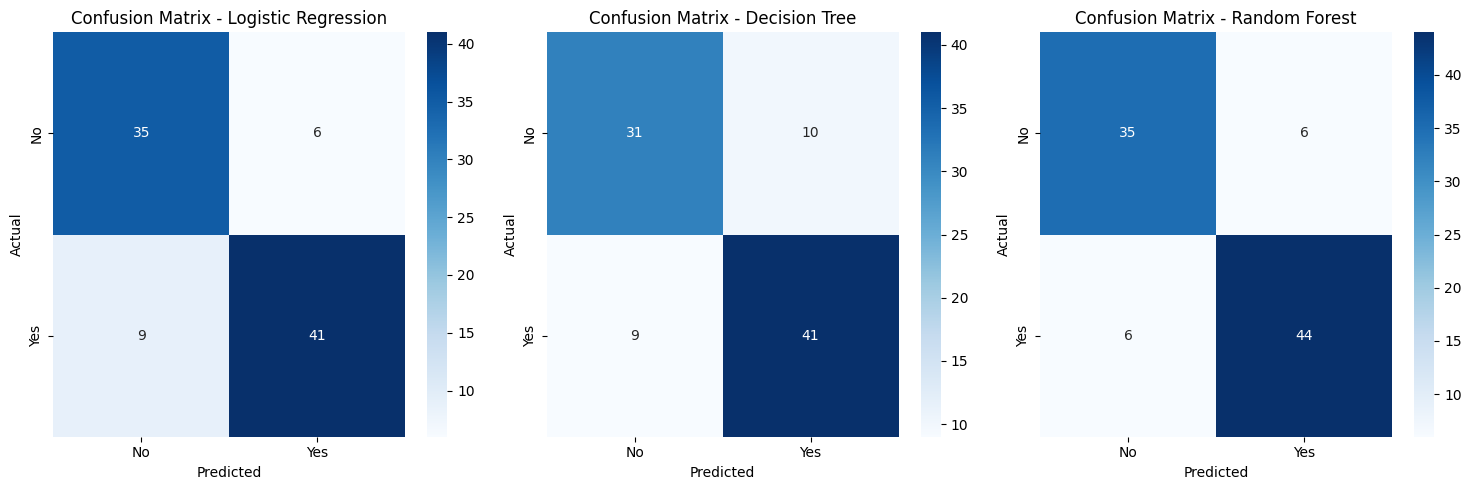

In [ ]:

# Confusion Matrices for All Models
conf_matrices = [conf_matrix_log_reg, conf_matrix_dtree, conf_matrix_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(15, 5))
for i, cm in enumerate(conf_matrices):
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:

# Classification Reports and Metrics
models = [y_pred_log_reg, y_pred_dtree, y_pred_rf]
for i, model in enumerate(models):
    print(f"Classification Report for {model_names[i]}:\n")
    print(classification_report(y_test, model))

    precision = precision_score(y_test, model)
    recall = recall_score(y_test, model)
    f1 = f1_score(y_test, model)
    print(f"{model_names[i]} - Precision: {precision}, Recall: {recall}, F1-Score: {f1}\n")


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

Logistic Regression - Precision: 0.8723404255319149, Recall: 0.82, F1-Score: 0.845360824742268

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Decision Tree - Precision: 0.803921568627451, Recall: 0.82, F1-Score: 0.8118811881188119

Classification Report for Random Forest:

              precision    r

In [ ]:
!git config --global user.email "dhanvanthsenthil"